# Model implementations

In [2]:
import pandas as pd
from surprise import Reader, Dataset

# load the ratings data
ratings = pd.read_csv('data/MovieLens_data/ratings_cleaned.csv')

# define a Reader and load the data into a Dataset
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# get 0.1% of the data to tune the hyperparameters
ratings_01 = ratings.sample(frac=0.001, random_state=1)
data_01 = Dataset.load_from_df(ratings_01[['userId', 'movieId', 'rating']], reader)

# get 0.5% of the data to tune the hyperparameters
ratings_05 = ratings.sample(frac=0.005, random_state=1)
data_05 = Dataset.load_from_df(ratings_05[['userId', 'movieId', 'rating']], reader)

# get 1% of the data to tune the hyperparameters
ratings_1 = ratings.sample(frac=0.01, random_state=1)
data_1 = Dataset.load_from_df(ratings_1[['userId', 'movieId', 'rating']], reader)

# get 10% of the data to tune the hyperparameters
ratings_10 = ratings.sample(frac=0.1, random_state=1)
data_10 = Dataset.load_from_df(ratings_10[['userId', 'movieId', 'rating']], reader)

# get 20% of the data to tune the hyperparameters
ratings_20 = ratings.sample(frac=0.2, random_state=1)
data_20 = Dataset.load_from_df(ratings_20[['userId', 'movieId', 'rating']], reader)

average_scores = [] # storing the average scores of the cross validation for each model to plot at the end (name of the model, score)

## KNN

KNN models aren't compatible with the current dataset due to the fact that the problem requires a lot of memory and computational power to run the models, so it's not viable to use them

### KNN Basic Model

In [8]:
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV

# using 0.01% of the data to tune the hyperparameters

# previously tested: k=10,20; min_k=3,4; name=cosine,msd,pearson; user_based=True,False; min_support=2,3,4; shrinkage=100,150
# last best score: 1.0539; last best parameters: {'k': 20, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': True, 'min_support': 2, 'shrinkage': 100}}

# getting the best model using grid search CV
params_grid = {
    'k': [20, 30],
    'min_k': [3, 4],
    'sim_options': {
        'name': ['cosine', 'msd', 'pearson'],
        'user_based': [True, False],
        'min_support': [2, 3, 4],
        'shrinkage': [100, 150]  # only relevant for 'pearson_baseline'
    }
}
grid_search = GridSearchCV(KNNBasic, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data_01) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('KNN Basic', grid_search.best_score['rmse'])) # storing the RMSE of the best model

Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    5.8s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    8.5s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   11.1s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   13.7s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:   16.3s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:   19.1s
Computing the cosine similarity matrix...

The KNN Basic model is not viable for usage due to the high memory usage and computational cost

### KNN With Means Model

In [13]:
from surprise import KNNWithMeans

# using 0.1% of the data to tune the hyperparameters

# previously tested: k=20,30; min_k=3,4; name=cosine,msd,pearson; user_based=True,False; min_support=2,3,4; shrinkage=100,150
# last best score: 1.560 ; last best parameters: {'k': 20, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': False, 'min_support': 2, 'shrinkage': 100}}

# getting the best model using grid search CV
params_grid = {
    'k': [20, 30],
    'min_k': [3, 4],
    'sim_options': {
        'name': ['cosine', 'msd', 'pearson'],
        'user_based': [True, False],
        'min_support': [2, 3, 4],
        'shrinkage': [100, 150]  # only relevant for 'pearson_baseline'
    }
}
grid_search = GridSearchCV(KNNWithMeans, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data_01)

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('KNN With Means', grid_search.best_score['rmse'])) # storing the RMSE of the best model

Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    6.0s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    8.7s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   11.3s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   14.1s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:   16.6s
Computing the cosine similarity matrix...
Done computing similarity matrix.
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:   19.3s
Computing the cosine similarity matrix...

## Normal Predictor Model

In [3]:
from surprise import NormalPredictor
from surprise.model_selection import GridSearchCV

# getting the best model using grid search CV
params_grid = {} # no hyperparameters to tune 
grid_search = GridSearchCV(NormalPredictor, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1) # testing done
grid_search.fit(data) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
#print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('Normal Predictor', grid_search.best_score['rmse'])) # storing the RMSE of the best model

Best score found in the gridSearchCV:  1.4324138537151778


## BaselineOnly Model

### Using SGD

In [4]:
from surprise import BaselineOnly
from surprise.model_selection import GridSearchCV

# previously tested: reg=0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05 and 0.1; learning_rate=0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004 and 0.005
# last best score: 0.8615; last best parameters: {'bsl_options': {'method': 'sgd', 'reg': 0.001, 'learning_rate': 0.002}}

# getting the best model using grid search CV
params_grid = {
    'bsl_options': {
        'method': ['sgd'],
        'reg': [0.001, 0.002, 0.003, 0.004, 0.005],
        'learning_rate': [0.001, 0.002, 0.003],
    }
}

grid_search = GridSearchCV(BaselineOnly, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('BaselineOnly (SGD)', grid_search.best_score['rmse'])) # storing the RMSE of the best model

Estimating biases using sgd...
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.4min
Estimating biases using sgd...
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  5.0min
Estimating biases using sgd...
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  7.3min
Estimating biases using sgd...
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  9.6min
Estimating biases using sgd...
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed: 11.8min
Estimating biases using sgd...
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed: 14.3min
Estimating biases using sgd...
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed: 16.5min
Estimating biases using sgd...
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed: 18.5min
Estimating biases using sgd...
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed: 20.9min
Estimating biases using sgd...
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed: 23.2min
Estimating biases using sgd...
[Parallel(n_jobs=1)]: Done  11 tasks      | elaps

### Using ALS

In [3]:
from surprise import BaselineOnly
from surprise.model_selection import GridSearchCV

# previously tested: reg_i=1, 2, 3, 4, 5, 10, 15; reg_u=3, 4, 5, 7, 10, 15; n_epochs=5, 10, 15, 20, 25 and 30
# last best score: 0.857; last best parameters: {'bsl_options': {'method': 'als', 'reg_i': 3, 'reg_u': 5, 'n_epochs': 20}}

# getting the best model using grid search CV
params_grid = {
    'bsl_options': {
        'method': ['als'],
        'reg_i': [2, 3, 4],
        'reg_u': [4, 5, 7],
        'n_epochs': [20, 25, 30]
    }
}

grid_search = GridSearchCV(BaselineOnly, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('BaselineOnly (ALS)', grid_search.best_score['rmse'])) # storing the RMSE of the best model

Estimating biases using als...
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.6min
Estimating biases using als...
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  7.3min
Estimating biases using als...
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed: 10.7min
Estimating biases using als...
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed: 14.0min
Estimating biases using als...
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed: 17.5min
Estimating biases using als...
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed: 21.8min
Estimating biases using als...
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed: 26.1min
Estimating biases using als...
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed: 30.1min
Estimating biases using als...
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed: 34.4min
Estimating biases using als...
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed: 39.0min
Estimating biases using als...
[Parallel(n_jobs=1)]: Done  11 tasks      | elaps

## SVD, SVD++ and NMF Models

### SVD Model

In [ ]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

# previously tested: n_epochs=15, 20, 22, 25, 30, 35 and 40; lr_all=0.001, 0.002, 0.003, 0.004 and 0.005; reg_all=0.05, 0.1, 0.15, 0.2, 0.3, 0.4 and 0.6
# last best score: 0.8417; last best parameters: {'n_epochs': 35, 'lr_all': 0.003, 'reg_all': 0.1}

# getting the best model using grid search CV (only the training set)
params_grid = {'n_epochs': [15, 20, 22, 25, 30, 35, 40], 'lr_all': [0.001, 0.002, 0.003, 0.004, 0.005], 'reg_all': [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6]} # testing done
grid_search = GridSearchCV(SVD, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('SVD', grid_search.best_score['rmse'])) # storing the RMSE of the best model

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  6.0min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed: 11.9min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed: 17.8min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed: 23.6min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed: 29.6min
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed: 35.7min
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed: 42.5min
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed: 48.1min
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed: 54.0min
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed: 60.5min
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed: 67.1min
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed: 72.9min
[Parallel(n_jobs=1)]: Done  13 tasks      | elapsed: 78.8min
[Parallel(n_jobs=1)]: Done  14 tasks      | elapsed: 84.7min
[Parallel(n_jobs=1)]: Done  15 tasks      | elapsed: 90.3min
[Parallel(n_jobs=1)]: Done  16 tasks      | elapsed: 95.7min
[Parallel(n_jobs=1)]: Do

### SVD++ Model

Running model on 10% of the data to tune the hyperparameters and because of the computational cost

In [3]:
from surprise import SVDpp
from surprise.model_selection import GridSearchCV

# previously tested: n_epochs=15, 20, 25, 30, 32, 35, 40, 45, 50, 55, 60, 65, 70 and 75; lr_all=0.001, 0.002, 0.003, 0.004, 0.005, 0.006 and 0.007, 0.01; reg_all=0.1, 0.2, 0.4, 0.6
# last best score: 0.875; last best parameters: {'n_epochs': 60, 'lr_all': 0.007, 'reg_all': 0.1}

# getting the best model using grid search CV
params_grid = {'n_epochs': [60, 65, 70, 75], 'lr_all': [0.005, 0.006, 0.007], 'reg_all': [0.1]} # testing done
grid_search = GridSearchCV(SVDpp, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data_10) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('SVD++', grid_search.best_score['rmse'])) # storing the RMSE of the best model

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  5.7min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed: 10.9min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed: 16.2min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed: 21.4min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed: 26.7min
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed: 31.8min
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed: 37.0min
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed: 42.4min
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed: 48.0min
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed: 53.4min
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed: 59.2min
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed: 65.7min
[Parallel(n_jobs=1)]: Done  13 tasks      | elapsed: 73.7min
[Parallel(n_jobs=1)]: Done  14 tasks      | elapsed: 81.0min
[Parallel(n_jobs=1)]: Done  15 tasks      | elapsed: 87.9min
[Parallel(n_jobs=1)]: Done  16 tasks      | elapsed: 95.3min
[Parallel(n_jobs=1)]: Do

### Non-negative Matrix Factorization Models (NMF)

In [4]:
from surprise import NMF
from surprise.model_selection import GridSearchCV

# previously tested: n_epochs=10, 15, 20, 22, 25, 30, 35; lr_bu=0.001, 0.002, 0.003 and 0.004; lr_bi=0.001, 0.002, 0.003, 0.004 and 0.005; reg_pu=0.1, 0.2, 0.3, 0.4, 0.5, 0.6;
# last best score: 0.923; last best params: {'n_epochs': 10, 'lr_bu': 0.002, 'lr_bi': 0.002, 'reg_pu': 0.1}

# getting the best model using grid search CV
params_grid = {'n_epochs': [10, 15, 22], 'lr_bu': [0.002, 0.003, 0.004], 'lr_bi': [0.002, 0.003, 0.004], 'reg_pu': [0.1, 0.2, 0.3]} # testing done
grid_search = GridSearchCV(NMF, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data_10) # fitting the best model
    
print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('NMF', grid_search.best_score['rmse'])) # storing the RMSE of the best model

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   17.4s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   37.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   55.6s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:  2.3min
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:  2.7min
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:  3.0min
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:  3.3min
[Parallel(n_jobs=1)]: Done  13 tasks      | elapsed:  3.6min
[Parallel(n_jobs=1)]: Done  14 tasks      | elapsed:  3.8min
[Parallel(n_jobs=1)]: Done  15 tasks      | elapsed:  4.0min
[Parallel(n_jobs=1)]: Done  16 tasks      | elapsed:  4.3min
[Parallel(n_jobs=1)]: Do

## Slope One Model



In [9]:
from surprise import SlopeOne
from surprise.model_selection import GridSearchCV

# best model: 0.8545

# getting the best model using grid search CV
params_grid = {} # no hyperparameters to tune
grid_search = GridSearchCV(SlopeOne, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100) # testing done
grid_search.fit(data) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
#print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('Slope One', grid_search.best_score['rmse'])) # storing the RMSE of the best model

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score found in the gridSearchCV:  0.8545399607181323
Best parameters found in the gridSearchCV:  {}


## Co-clustering Model

In [15]:
from surprise import CoClustering
from surprise.model_selection import GridSearchCV

# previously tested: n_cltr_u=1, 2, 3, 4, 5, 10, 20, 25 and 30; n_cltr_i=1, 2, 3, 4, 5, 10, 15, 20, 25 and 30; n_epochs=5, 10, 15, 20, 30, 35 and 40
# last best score: 0.9481; last best params: {'n_cltr_u': 1, 'n_cltr_i': 2, 'n_epochs': 10}

# getting the best model using grid search CV
params_grid = {'n_cltr_u': [1, 2, 3], 'n_cltr_i': [1, 2, 3], 'n_epochs': [5, 10, 15, 20, 35, 30]}
grid_search = GridSearchCV(CoClustering, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100) # testing done
grid_search.fit(data_10) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('Co-clustering', grid_search.best_score['rmse'])) # storing the RMSE of the best model

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   30.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   45.3s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:  2.4min
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:  2.7min
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:  3.1min
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:  3.6min
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:  4.1min
[Parallel(n_jobs=1)]: Done  13 tasks      | elapsed:  4.6min
[Parallel(n_jobs=1)]: Done  14 tasks      | elapsed:  5.1min
[Parallel(n_jobs=1)]: Done  15 tasks      | elapsed:  5.6min
[Parallel(n_jobs=1)]: Done  16 tasks      | elapsed:  6.2min
[Parallel(n_jobs=1)]: Do

## Plotting the best scores of each model

In [4]:
average_scores = [('Normal Predictor', 1.4324138537151778), ('BaselineOnly (SGD)', 0.8615133939473374),
                  ('BaselineOnly (ALS)', 0.8572013563447013), ('SVD', 0.8417), ('SVD++', 0.8749266972367392),
                  ('NMF', 0.9233914423889761), ('Slope One', 0.8545399607181323), ('Co-clustering', 0.9481257380355783)]

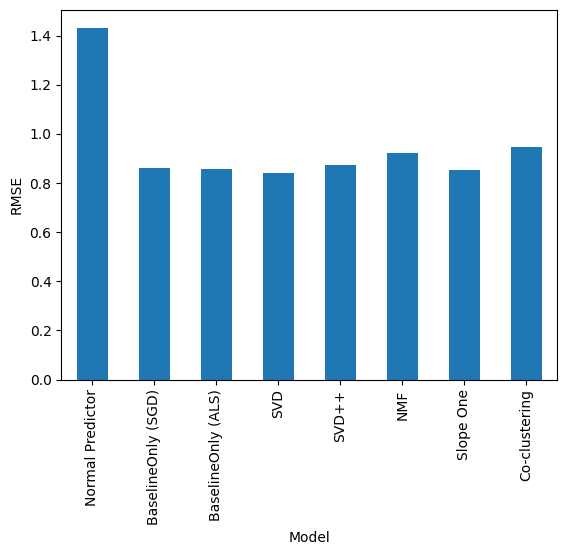

In [6]:
import matplotlib.pyplot as plt

# plotting the best scores of each model, the lower the RMSE the better the model
best_scores = pd.DataFrame(average_scores, columns=['Model', 'RMSE'])
best_scores.plot(kind='bar', x='Model', y='RMSE', legend=False)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()